# Data Driven Science and Engineering
## Chapter 1 - SVD
To see explintion of SVD, please see the markdown file within this folder

-------

importing librarys

In [16]:
import pandas as pd
import numpy as np
from PIL import Image
from IPython import display


------

### Example 1:
#### Matrix approximation and image compression
SVD have an ability where you can **choose** the level of compression you would like. What I'm going to do is run an SVD on the below image, and then choose arbitaries level of compression on it

Notice a few things
 1) this docker made me do some.....workarounds :/
 2) with a low r (r < 50) you still get a really solid image with a shit-ton of space savings.
 3) to fully resotre the image, you may need more than the data shows 

In [17]:
import pandas as pd
import numpy as np
from PIL import Image
from IPython import display

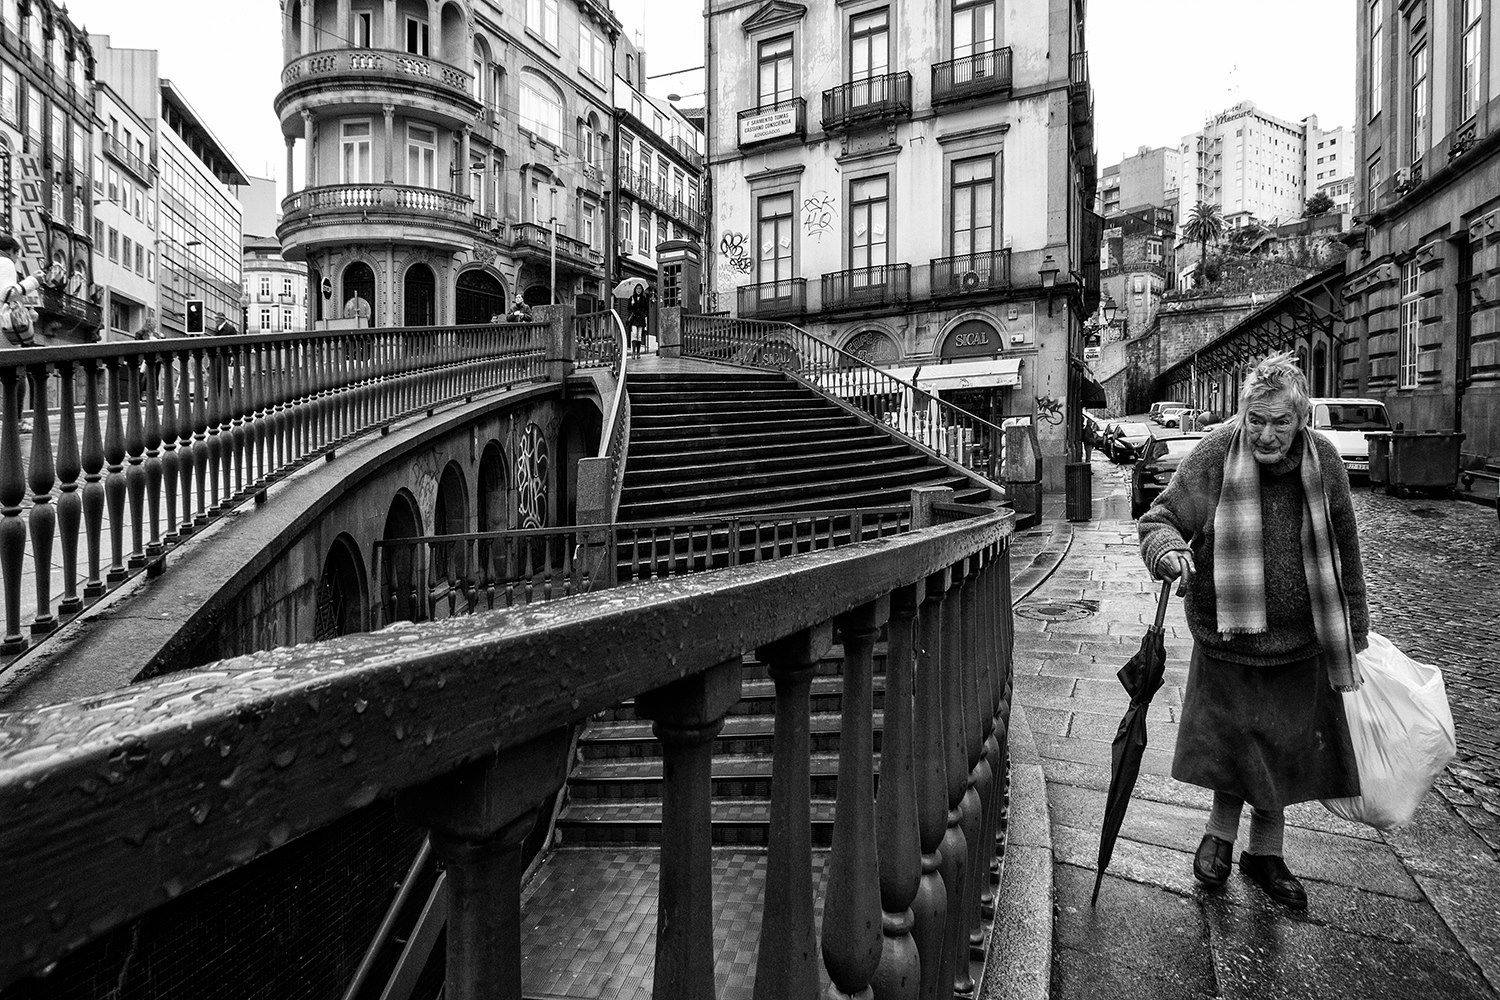

In [3]:
IMG_DIR = '/home/jovyan/work/data_driven_science_and_engineering/Ch1/Data/'
display.Image(IMG_DIR + 'lady_and_street.jpg')

In [4]:
image = Image.open(IMG_DIR + 'lady_and_street.jpg')
npicture = np.asarray(image)[:,:,0]

In [5]:
nu, ns, nv = np.linalg.svd(npicture, full_matrices = False)

In [6]:
print(f" U shape {nu.shape}, S shape {ns.shape}, V shape {nv.transpose().shape}, original shape {npicture.shape}")

 U shape (1000, 1000), S shape (1000,), V shape (1500, 1000), original shape (1000, 1500)


recall
$\bar X=U\Sigma V^T$ 

Here are the basic steps of compression: below is matlab code
```{matlab}
for r = [5 20 100];
    xApprox = U(:,1:r) * S(1:r, 1:r)*V(:,1:r)
    figure, imagesc(Xapprox), axis off
    title(['r=',num2str(r,'%d'),']);
end;
```

In [173]:
for r in [1,10, 25, 50, 100, 150 , 250, 400, 500, 750, 900, 1000]:
    nuA = nu[:,0:r]
    nsA =np.diag(ns[0:r])
    nvA = nv[0:r,:]
    xApprox =nuA @ nsA @ nvA
    
    # calcualting  what savings we got and the relative error of it all 
    POC = int((nuA.shape[0] * nuA.shape[1] + nsA.shape[0] + nvA.shape[0] * nvA.shape[1])/(1500*1000) * 100)
    error =  np.sum(np.abs(xApprox - npicture))/np.sum(npicture) * 1000 // 1 / 10
    print(f"new dimensions with the reducitons of r {r}: U = {nuA.shape}, S = {nsA.shape}, V = {nvA.shape}, appox = {xApprox.shape}, percent of total {POC}% , error = {error}")
    # saving it down, we need the np.unit8 so that Pillow can deal with the image :/
    im = Image.fromarray(np.uint8(xApprox))
    im.save(IMG_DIR + 'lady_and_street_r' + str(r) + '.jpg')

new dimensions with the reducitons of r 1: U = (1000, 1), S = (1, 1), V = (1, 1500), appox = (1000, 1500), percent of total 0% , error = 51.7
new dimensions with the reducitons of r 10: U = (1000, 10), S = (10, 10), V = (10, 1500), appox = (1000, 1500), percent of total 1% , error = 33.3
new dimensions with the reducitons of r 25: U = (1000, 25), S = (25, 25), V = (25, 1500), appox = (1000, 1500), percent of total 4% , error = 26.5
new dimensions with the reducitons of r 50: U = (1000, 50), S = (50, 50), V = (50, 1500), appox = (1000, 1500), percent of total 8% , error = 21.6
new dimensions with the reducitons of r 100: U = (1000, 100), S = (100, 100), V = (100, 1500), appox = (1000, 1500), percent of total 16% , error = 17.8
new dimensions with the reducitons of r 150: U = (1000, 150), S = (150, 150), V = (150, 1500), appox = (1000, 1500), percent of total 25% , error = 15.8
new dimensions with the reducitons of r 250: U = (1000, 250), S = (250, 250), V = (250, 1500), appox = (1000, 1

Let's see how the images look at verious level of compressions

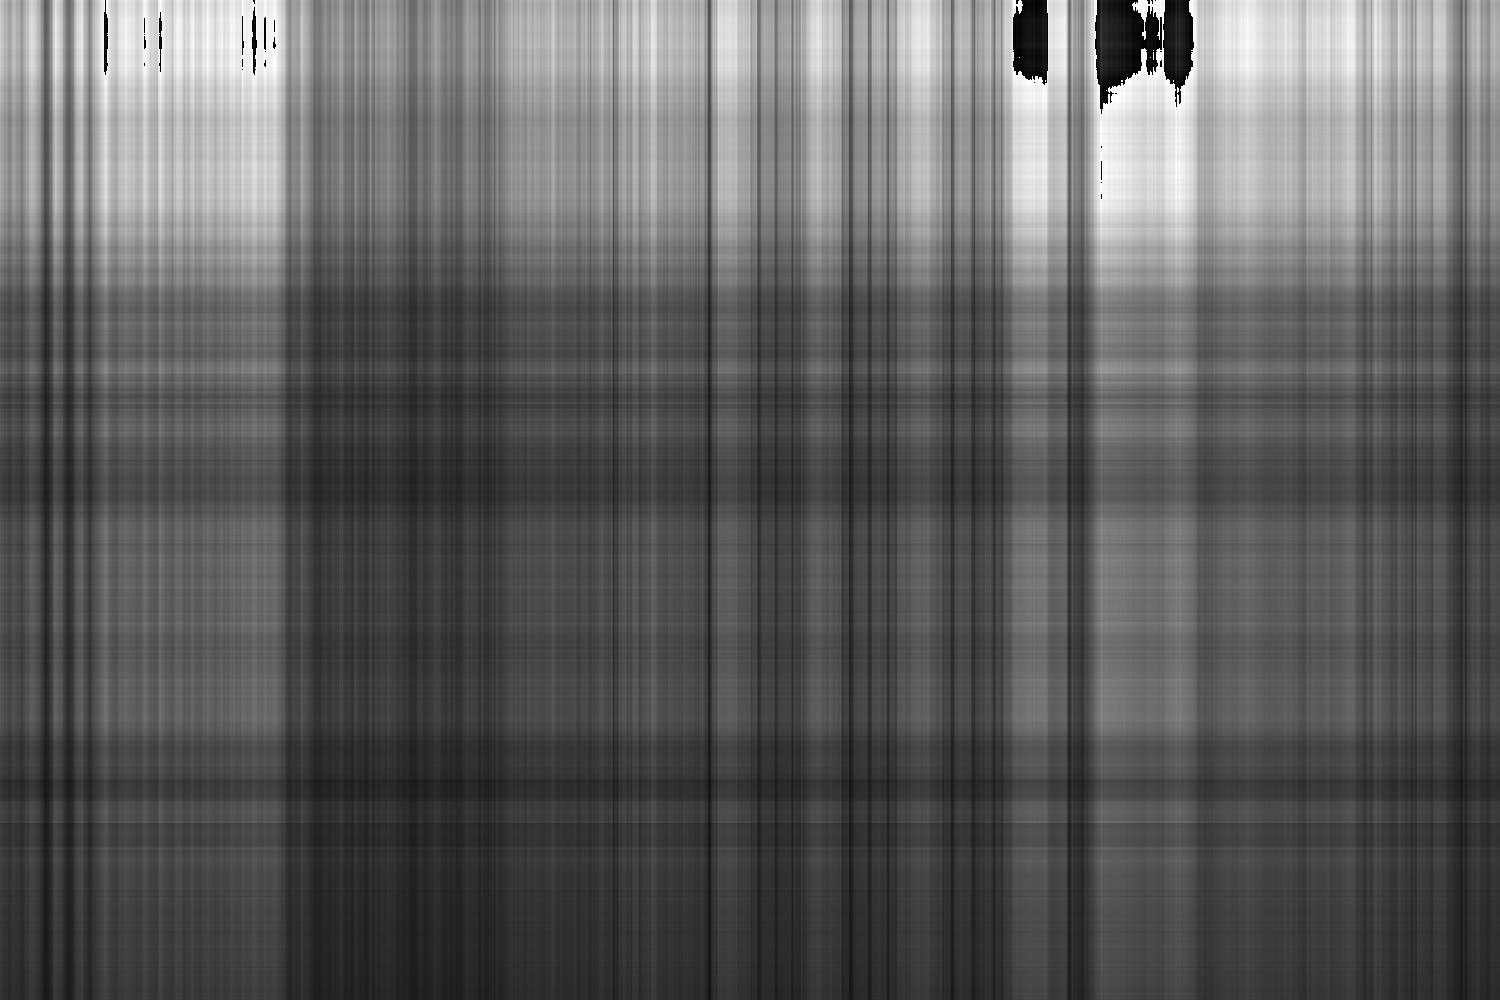

In [88]:
display.Image(IMG_DIR + 'lady_and_street_r1.jpg')

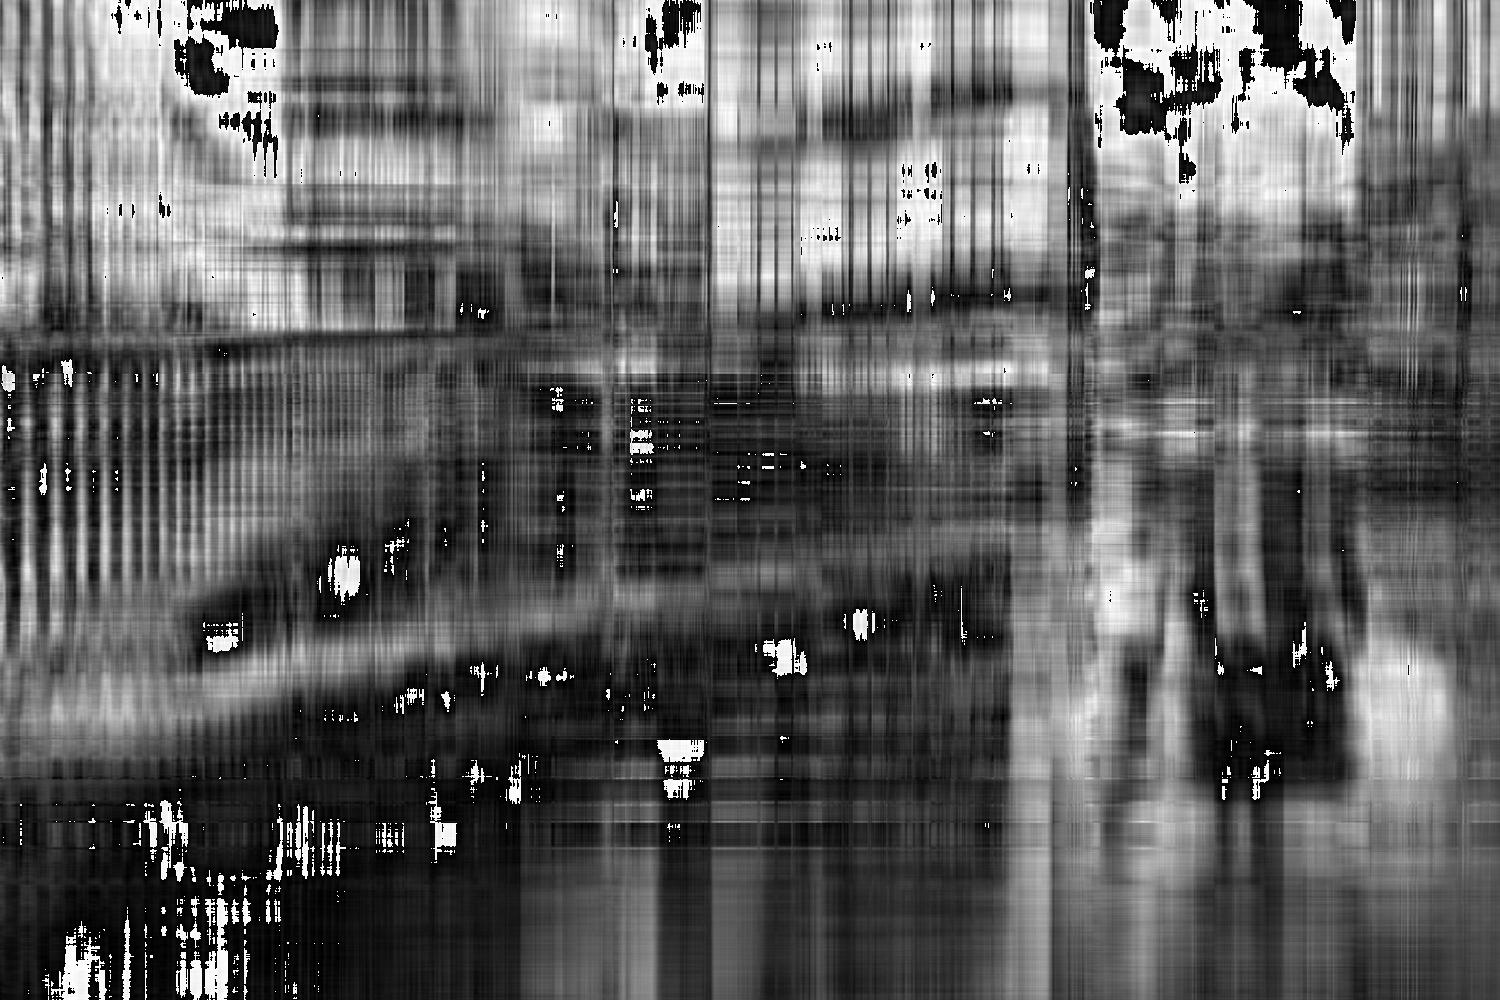

In [89]:
display.Image(IMG_DIR + 'lady_and_street_r10.jpg')

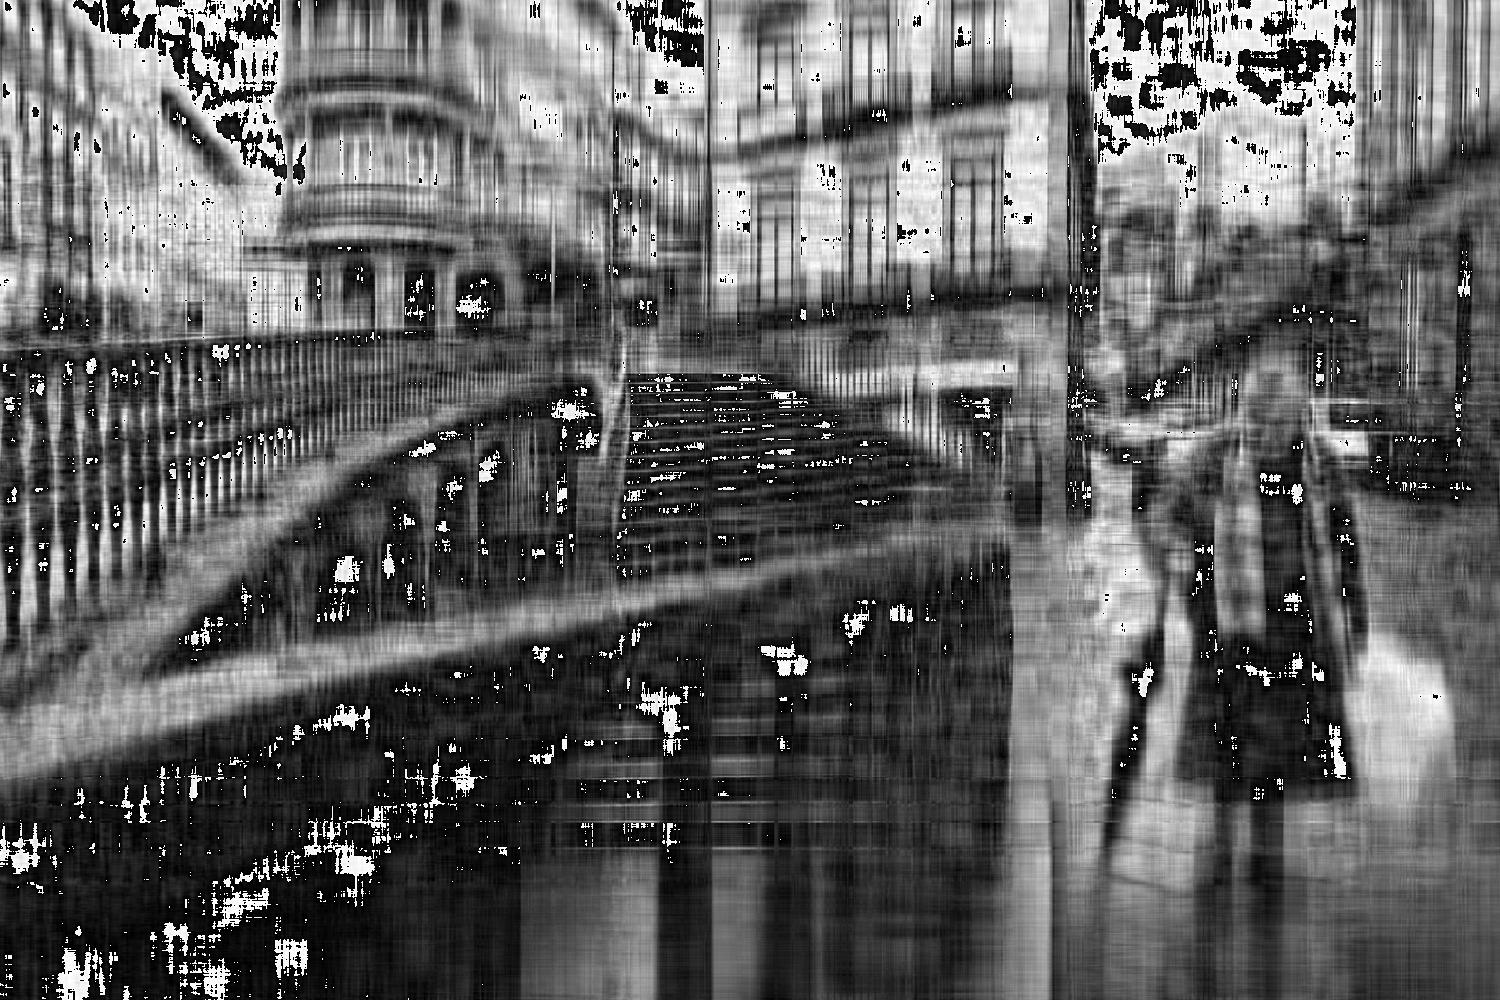

In [90]:
display.Image(IMG_DIR + 'lady_and_street_r25.jpg')

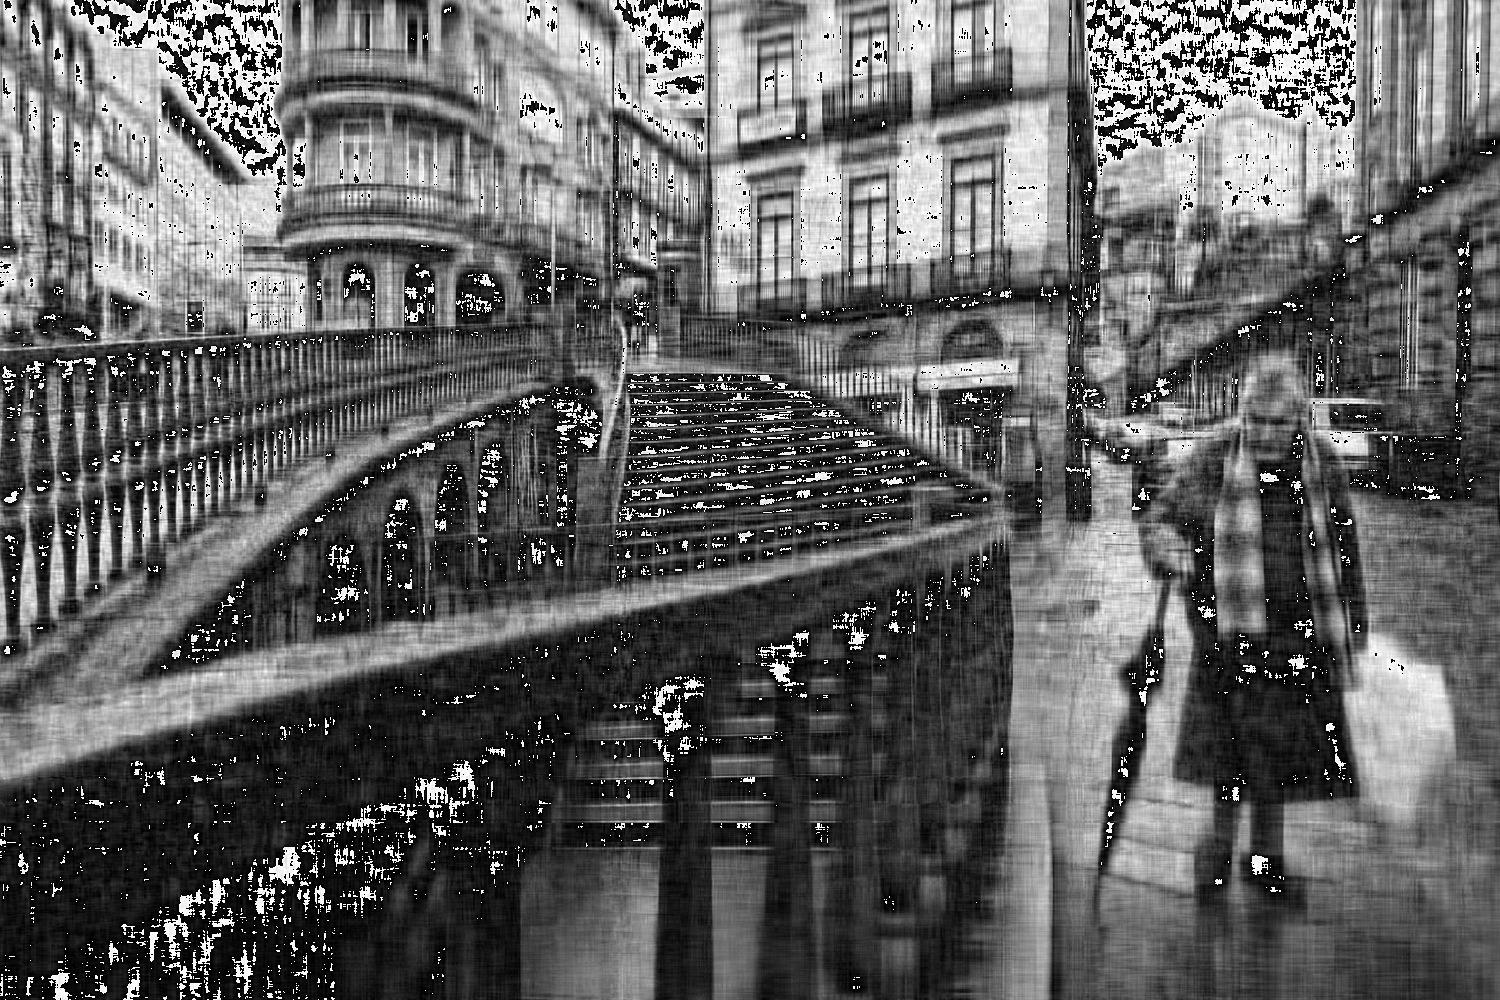

In [91]:
display.Image(IMG_DIR + 'lady_and_street_r50.jpg')

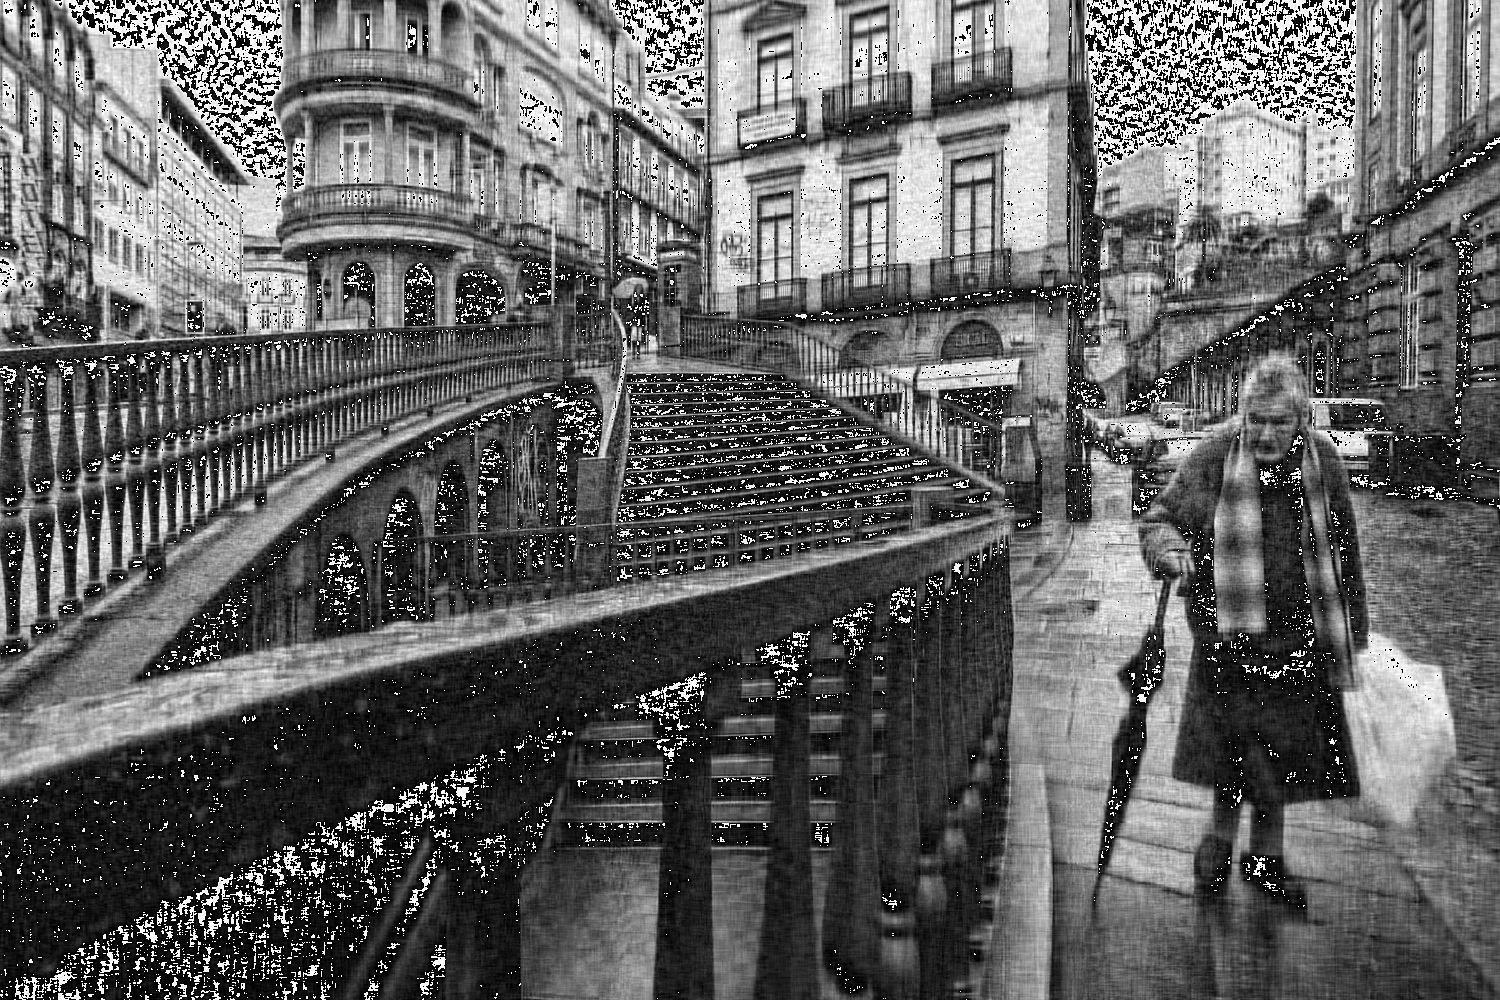

In [92]:
display.Image(IMG_DIR + 'lady_and_street_r100.jpg')

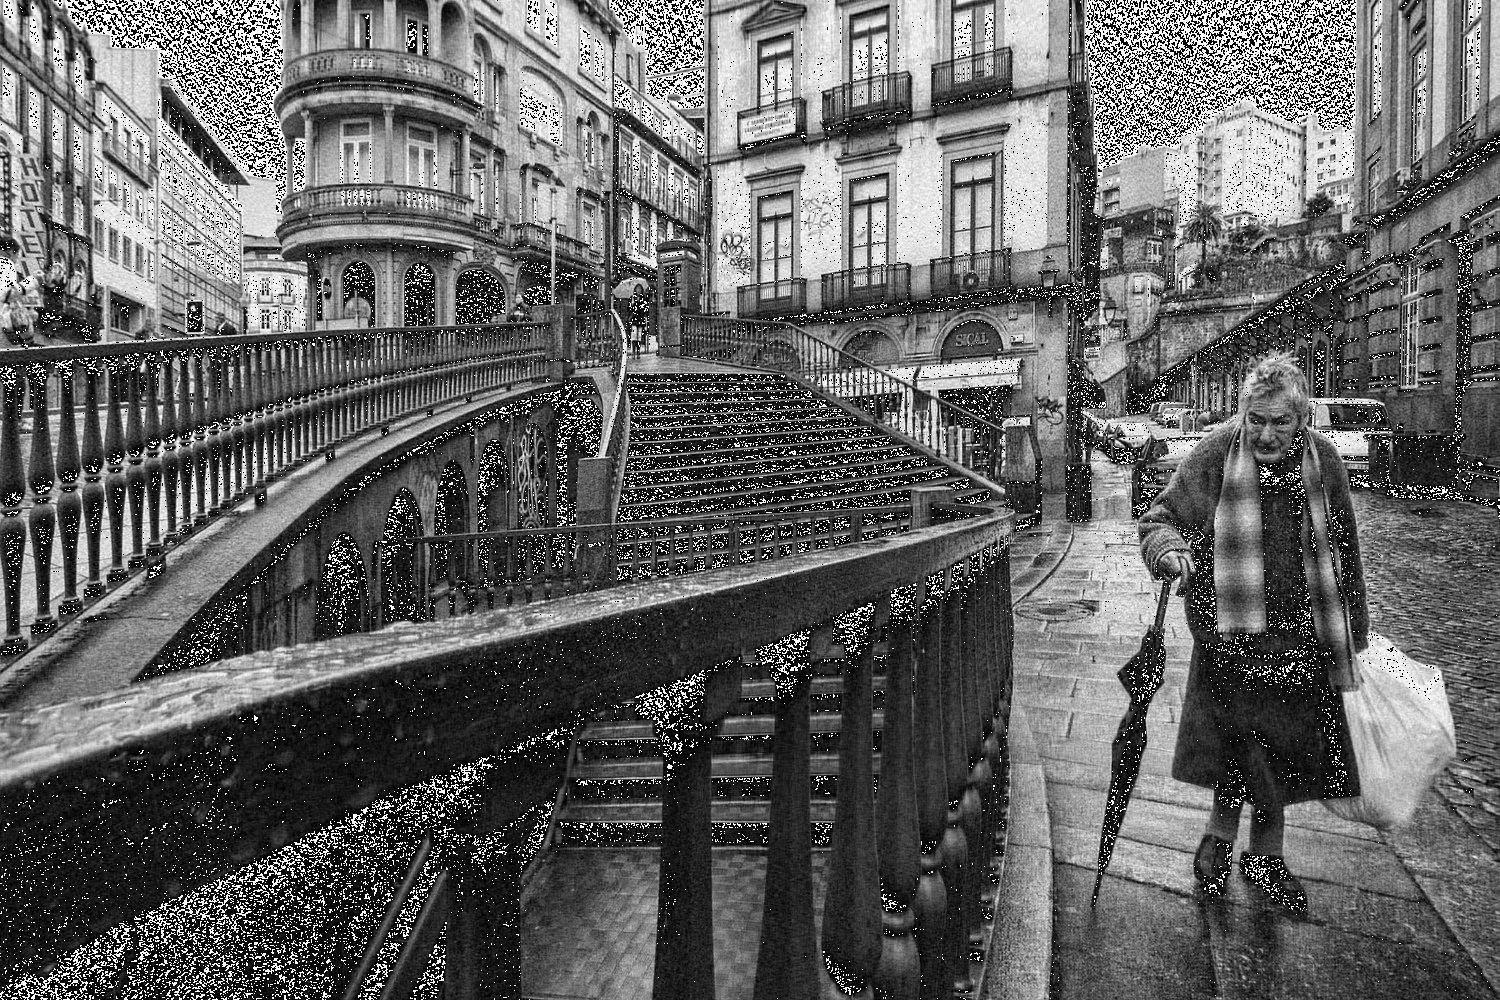

In [93]:
display.Image(IMG_DIR + 'lady_and_street_r250.jpg')

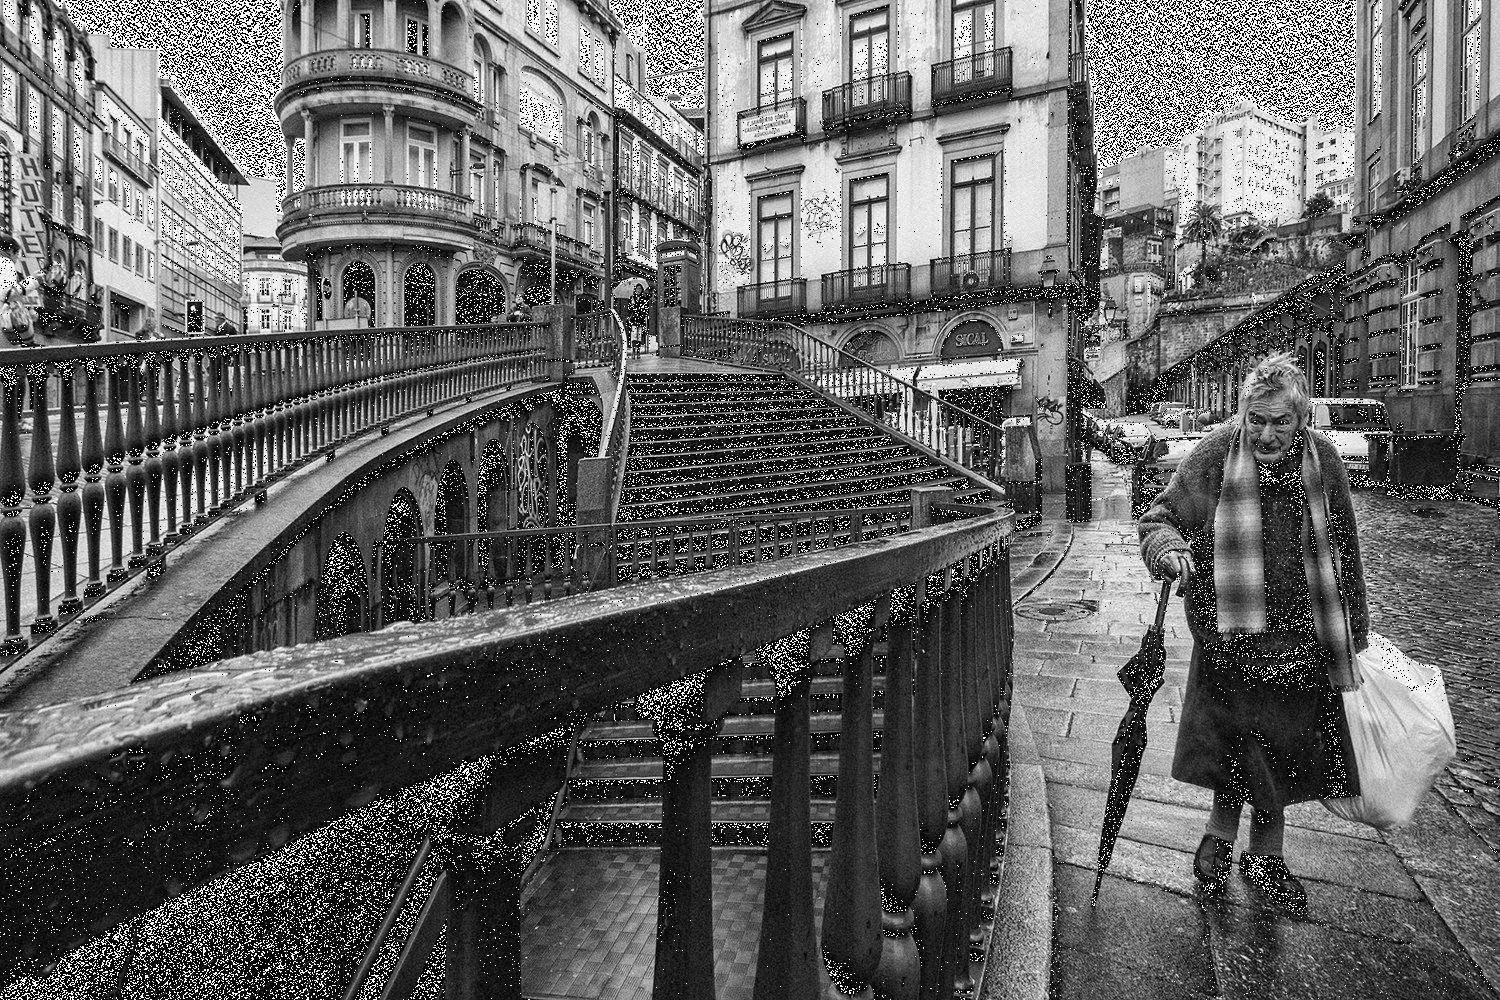

In [94]:
display.Image(IMG_DIR + 'lady_and_street_r500.jpg')

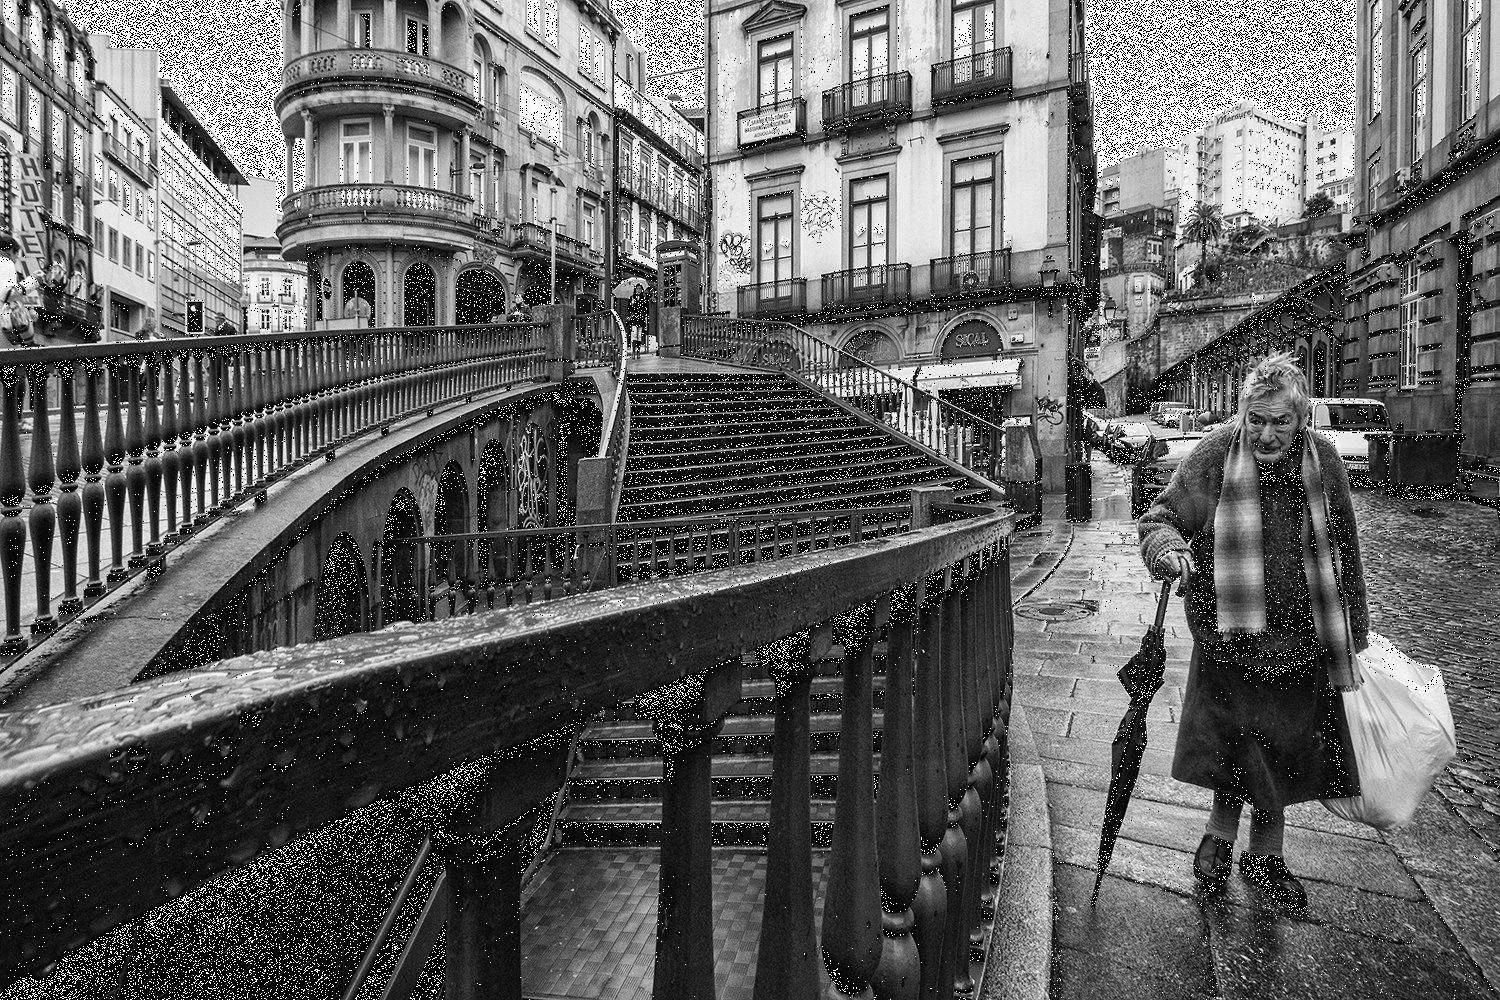

In [95]:
display.Image(IMG_DIR + 'lady_and_street_r750.jpg')

------

### Example 2 
#### OLS
Ols can also be done with SVD, the below exmaple, we will run OLS on the Boston housing Data set, and generate Beta values


In [141]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm_api
import statsmodels.api as sm

In [101]:
housing = pd.DataFrame(np.loadtxt('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'),
                       columns = [ 'crime_per_capita', # per capita crime rate by town
                                'zone_proportion', # proportion of residential land zoned for lots over 25,000 sq.ft.per capita crime rate by town
                               'nonretail_business', #proportion of non-retail business acres per town
                               'on_river', #Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
                               'nox_ppm',# nitric oxides concentration (parts per 10 million)
                               'rooms', # average number of rooms per dwelling
                               'age', # proportion of owner-occupied units built prior to 1940
                               'distance_empoyment', # weighted distances to five Boston employment centres
                               'highway_index_access', #index of accessibility to radial highways
                               'tax', # full-value property-tax rate per $10,00.60
                               'pupil-teacher-ratio', #pupil-teacher ratio by town
                               'blank index', # 1000(Bk - 0.63)^2 where Bk is the proportion of blacks  by town
                               'lower_status', # % lower status of the population
                               'median_price' # Median value of owner-occupied homes in $1000's
                                 ])
housing.head()

crime_per_capita  zone_proportion  nonretail_business  on_river  nox_ppm  \
0           0.00632             18.0                2.31       0.0    0.538   
1           0.02731              0.0                7.07       0.0    0.469   
2           0.02729              0.0                7.07       0.0    0.469   
3           0.03237              0.0                2.18       0.0    0.458   
4           0.06905              0.0                2.18       0.0    0.458   

   rooms   age  distance_empoyment  highway_index_access    tax  \
0  6.575  65.2              4.0900                   1.0  296.0   
1  6.421  78.9              4.9671                   2.0  242.0   
2  7.185  61.1              4.9671                   2.0  242.0   
3  6.998  45.8              6.0622                   3.0  222.0   
4  7.147  54.2              6.0622                   3.0  222.0   

   pupil-teacher-ratio  blank index  lower_status  median_price  
0                 15.3       396.90          4.98          24.0  
1                 17.8       396.90          9.14          21.6  
2                 17.8       392.83          4.03          34.7  
3                 18.7       394.63          2.94          33.4  
4                 18.7       396.90          5.33          36.2

here is the matlab code for the below:
```
b = housing(:,14); % housing values in 100s$
A = housing(:,1:13);
A = [A ones(size(A,1),1)]; % pad with ones for the y-intercept
 [U,S,V] = svd(A, 'econ');
 x = V*inv(S) * U' * b;
 ```

In [165]:
b_housing = housing.iloc[:,13]
a_housing = housing.iloc[:,0:13]
a_housing['intercept'] = 1

In [176]:
U, S, V = np.linalg.svd(a_housing.values, full_matrices = False)
print(f" U shape {U.shape}, S shape {S.shape}, V shape {V.shape}, original shape {housing.shape}")

 U shape (506, 14), S shape (14,), V shape (14, 14), original shape (506, 14)


In [177]:
np.transpose(V) @ np.linalg.inv(np.diag(S)) @ np.transpose(U) @ b_housing.values

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01,  3.64594884e+01])

In [178]:
sm_results = sm.OLS(b_housing, a_housing).fit()
sm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           median_price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 16 Jul 2022   Prob (F-statistic):          6.72e-135
Time:                        19:47:06   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
crime_per_capita        -0.1080      0.033     -3.287      0.001      -0.173      -0.043
zone_proportion          0.0464      0.014      3.382      0.001       0.019       0.073
nonretail_business       0.0206      0.061      0.334      0.738      -0.100       0.141
on_river                 2.6867      0.862      3.118      0.002       0.994       4.380
nox_ppm                -17.7666      3.820     -4.651      0.000     -25.272     -10.262
rooms                    3.8099      0.418      9.116      0.000       2.989       4.631
age                      0.0007      0.013      0.052      0.958      -0.025       0.027
distance_empoyment      -1.4756      0.199     -7.398      0.000      -1.867      -1.084
highway_index_access     0.3060      0.066      4.613      0.000       0.176       0.436
tax                     -0.0123      0.004     -3.280      0.001      -0.020      -0.005
pupil-teacher-ratio     -0.9527      0.131     -7.283      0.000      -1.210      -0.696
blank index              0.0093      0.003      3.467      0.001       0.004       0.015
lower_status            -0.5248      0.051    -10.347      0.000      -0.624      -0.425
intercept               36.4595      5.103      7.144      0.000      26.432      46.487
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [116]:
' + '.join([x for x in housing.columns if x != 'median_price'])

'crime_per_capita + zone_proportion + nonretail_business + on_river + nox_ppm + rooms + age + distance_empoyment + highway_index_access + tax + pupil-teacher-ratio + blank index + lower_status'

In [132]:
housing

crime_per_capita  zone_proportion  nonretail_business  on_river  nox_ppm  \
0             0.00632             18.0                2.31       0.0    0.538   
1             0.02731              0.0                7.07       0.0    0.469   
2             0.02729              0.0                7.07       0.0    0.469   
3             0.03237              0.0                2.18       0.0    0.458   
4             0.06905              0.0                2.18       0.0    0.458   
..                ...              ...                 ...       ...      ...   
501           0.06263              0.0               11.93       0.0    0.573   
502           0.04527              0.0               11.93       0.0    0.573   
503           0.06076              0.0               11.93       0.0    0.573   
504           0.10959              0.0               11.93       0.0    0.573   
505           0.04741              0.0               11.93       0.0    0.573   

     rooms   age  distance_empoyment  highway_index_access    tax  \
0    6.575  65.2              4.0900                   1.0  296.0   
1    6.421  78.9              4.9671                   2.0  242.0   
2    7.185  61.1              4.9671                   2.0  242.0   
3    6.998  45.8              6.0622                   3.0  222.0   
4    7.147  54.2              6.0622                   3.0  222.0   
..     ...   ...                 ...                   ...    ...   
501  6.593  69.1              2.4786                   1.0  273.0   
502  6.120  76.7              2.2875                   1.0  273.0   
503  6.976  91.0              2.1675                   1.0  273.0   
504  6.794  89.3              2.3889                   1.0  273.0   
505  6.030  80.8              2.5050                   1.0  273.0   

     pupil-teacher-ratio  blank index  lower_status  median_price  
0                   15.3       396.90          4.98          24.0  
1                   17.8       396.90          9.14          21.6  
2                   17.8       392.83          4.03          34.7  
3                   18.7       394.63          2.94          33.4  
4                   18.7       396.90          5.33          36.2  
..                   ...          ...           ...           ...  
501                 21.0       391.99          9.67          22.4  
502                 21.0       396.90          9.08          20.6  
503                 21.0       396.90          5.64          23.9  
504                 21.0       393.45          6.48          22.0  
505                 21.0       396.90          7.88          11.9  

[506 rows x 14 columns]

### Example 3 Eigenfaces

In [68]:
import numpy as np
from os import walk
from imageio import imread
from matplotlib import pyplot as plt

#### Loading image faces in a data set :/

In [75]:
full_img_dict = {}
for cd, d, f in walk('/home/jovyan/work/data/data_driven_science/Ch1/CroppedYale/'):
    if d == []:
        folder_name = cd.split('/')[-1]
        for file in f:
            full_img_dict.setdefault(folder_name, []).append(imread(cd + '/' + file))
    

In [62]:
img_dict['yaleB16'][1].shape


(192, 168)

Now pulling 36 images out into a list for latet

In [93]:
faces = []
counter = 0
for K in full_img_dict.keys():
    faces.append(full_img_dict[K][12])
    counter += 1
    if counter > 35:
        break

In [71]:
m = 168
n = 192

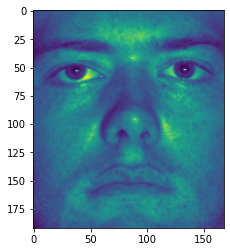

In [95]:
plt.imshow(faces[12])

In [112]:
all_persons = np.zeros((n*6,m*6))
face_cols = np.zeros((n,m*36))
count = 0

In [119]:
print(f"{0}:{m*(count)} to {n} :  {m*(count + 1)}" )

0:0 to 192 :  168


In [114]:
for j in range(6):
    for k in range(6):
        all_persons[j*n: (j+1)*n, k*m : (k+1)*m] = faces[count]
        face_cols[0: m*(count), n: m*(count + 1) ] = faces[count]
        count += 1

ValueError: could not broadcast input array from shape (192,168) into shape (0,0)

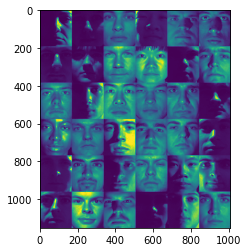

In [102]:
plt.imshow(all_persons)

Now putting each face into a columm